<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование тарифов


Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.     

ОПИСАНИЕ ТАРИФОВ  

 Тариф «Смарт»  
 1. Ежемесячная плата: 550 рублей  
 2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
 3. Стоимость услуг сверх тарифного пакета:  
 - минута разговора: 3 рубля  
 - сообщение: 3 рубля  
 - 1 Гб интернет-трафика: 200 рублей  

Тариф «Ультра»  
 1. Ежемесячная плата: 1950 рублей  
 2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
 3. Стоимость услуг сверх тарифного пакета:  
 - минута разговора: 1 рубль  
 - сообщение: 1 рубль  
 - 1 Гб интернет-трафика: 150 рублей  
Важно: оператор всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

ОПИСАНИЕ ДАННЫХ

Таблица users (информация о пользователях):

    - user_id — уникальный идентификатор пользователя
    - first_name — имя пользователя
    - last_name — фамилия пользователя
    - age — возраст пользователя (годы)
    - reg_date — дата подключения тарифа (день, месяц, год)
    - churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    - city — город проживания пользователя
    - tariff — название тарифного плана

Таблица calls (информация о звонках):

    - id — уникальный номер звонка
    - call_date — дата звонка
    - duration — длительность звонка в минутах
    - user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):

    - id — уникальный номер сообщения
    - message_date — дата сообщения
    - user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):

    - id — уникальный номер сессии
    - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    - session_date — дата интернет-сессии
    - user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):

    - tariff_name — название тарифа
    - rub_monthly_fee — ежемесячная абонентская плата в рублях
    - minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    - messages_included — количество сообщений в месяц, включённых в абонентскую плату
    - mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    - rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)



## Изучение данных из файла

In [1]:
#Импорт библиотек
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
pd.set_option('display.max_columns', 25)

In [3]:
#Чтение файлов с локального диска
#Df_tariffs = pd.read_csv(r"D:\YANDEX.PRAKTIKUM\DATA_SCIENCE\Статистический_анализ_данных\tariffs.csv")
#Df_users = pd.read_csv(r"D:\YANDEX.PRAKTIKUM\DATA_SCIENCE\Статистический_анализ_данных\users.csv")
#Df_calls = pd.read_csv(r"D:\YANDEX.PRAKTIKUM\DATA_SCIENCE\Статистический_анализ_данных\calls.csv")
#Df_messages = pd.read_csv(r"D:\YANDEX.PRAKTIKUM\DATA_SCIENCE\Статистический_анализ_данных\messages.csv")
#Df_internet = pd.read_csv(r"D:\YANDEX.PRAKTIKUM\DATA_SCIENCE\Статистический_анализ_данных\internet.csv", index_col=0)
#Чтение файлов с сервера
Df_tariffs = pd.read_csv('/datasets/tariffs.csv')
Df_users = pd.read_csv('/datasets/users.csv')
Df_calls = pd.read_csv('/datasets/calls.csv')
Df_messages = pd.read_csv('/datasets/messages.csv')
Df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)

In [4]:
Df_tariffs

,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
messages_included,,,,,,,
50,15360,500,550,200,3,3,smart
1000,30720,3000,1950,150,1,1,ultra


In [4]:
Df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [5]:
Df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [6]:
Df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
Df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [8]:
Df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
Df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
Df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
Df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [12]:
Df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


### Вывод

В исходных файлах представленны несколько таблиц, описывающих данные пользователей и тарифные планы, которые они используют, а также данные о звонках, сообщениях и интернет-трафике. Данные неоднородны по размеру. В некоторых таблицах есть пропуски, а так же типы данных в некоторых колонках неверны. В частности:  
в Df_tariffs пропуски отсутствуют;  
в Df_users колонки с датами типа object, есть пропуски;  
в Df_calls колонки с датами типа object;  
в Df_messages колонки с датами типа object;  
в Df_inernet колонки с датами типа object.  
Проведем предобработку данных.

## Предобработка данных

1) Проверка на наличие отрицательных значениий

Проверим на отрицательные значения все числовые данные из всех таблиц.
Отрицательных быть не должно.

Сформируем список с таблицами, где есть числовые значения, а также список с названиями этих таблиц

In [13]:
list_tables = [Df_tariffs, Df_users, Df_calls, Df_messages, Df_internet]
list_nametables = ['Df_tariffs', 'Df_users', 'Df_calls', 'Df_messages', 'Df_internet']

Применим цикл перебирающий таблицы из первого списка, двигаемся по индексам списка

In [14]:
for i in range(0, len(list_tables)):
    print('-----------------------------')
    print('|{: <27}|'.format(list_nametables[i]))# печатаем название таблицы в которой идет проверка
    print('-----------------------------')
    
    # применим цикл перебирающий названия колонок в индексе метода dtype текущей таблицы
    for column_name in list_tables[i].dtypes.index:
        
        # если тип данных для колонки соответсвует int или float, то применим к ним проверку на отрицательные значения
        if list_tables[i][column_name].dtypes=='int64' or list_tables[i][column_name].dtypes=='float64':
            if list_tables[i][list_tables[i][column_name] < 0][column_name].count() > 0:
                print('|{: <22}|{: >4}|'.format(column_name, 'Есть'))
            else:
                print('|{: <22}|{: >4}|'.format(column_name, 'Нет'))
    print('-----------------------------')
    print()

-----------------------------
|Df_tariffs                 |
-----------------------------
|messages_included     | Нет|
|mb_per_month_included | Нет|
|minutes_included      | Нет|
|rub_monthly_fee       | Нет|
|rub_per_gb            | Нет|
|rub_per_message       | Нет|
|rub_per_minute        | Нет|
-----------------------------

-----------------------------
|Df_users                   |
-----------------------------
|user_id               | Нет|
|age                   | Нет|
-----------------------------

-----------------------------
|Df_calls                   |
-----------------------------
|duration              | Нет|
|user_id               | Нет|
-----------------------------

-----------------------------
|Df_messages                |
-----------------------------
|user_id               | Нет|
-----------------------------

-----------------------------
|Df_internet                |
-----------------------------
|mb_used               | Нет|
|user_id               | Нет|
------

Таким образом, отрицательные значения отсутствуют.

2) Проверка на дубликаты

Воспользуемся списком таблиц из предыдущего цикла

In [15]:
for i in range(0, len(list_tables)):
    if list_tables[i].duplicated().sum() == 0:
        print('|{: <12}|{: >15}|'.format(list_nametables[i], 'дубликатов нет'))
    elif list_tables[i].duplicated().sum() != 0:
        print('|{: <12}|{: >15}|'.format(list_nametables[i], 'есть дубликаты'))

|Df_tariffs  | дубликатов нет|
|Df_users    | дубликатов нет|
|Df_calls    | дубликатов нет|
|Df_messages | дубликатов нет|
|Df_internet | дубликатов нет|


Наличие дубликатов в исследуемых таблицах не выявлено.

3) Приведение данных к корректным типам последовательно в каждом датафрейме

Для датафрейма Df_tariffs приведение к корректным типам данных не требуется.

Для датафрейма Df_users необходимо привести колонки с датами к типу datetime. Кроме того, в столбце churn_date
очень много пропусков из-за того, что клиенты до сих пор пользуются тарифом. Это означает, что привести ее к нужному типу не получится не избавившись от пропусков. Укаазанная колонка в анализе не нужна, поэтому оставим и пропуски и тип данных можно оставить без изменения. 

Применим метод pd.to_datetime для приведения временных данных в надлежащий вид

In [16]:
Df_users['reg_date'] = pd.to_datetime(Df_users['reg_date'], format='%Y-%m-%d')
Df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


В датафрейма Df_calls приведем колонку с датами к типу datetime.

In [17]:
Df_calls['call_date'] = pd.to_datetime(Df_calls['call_date'], format='%Y-%m-%d')
Df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


В датафрейма Df_messages приведем колонку с датами к типу datetime.

In [18]:
Df_messages['message_date'] = pd.to_datetime(Df_messages['message_date'], format='%Y-%m-%d')
Df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


В датафрейма Df_inernet приведем колонку с датами к типу datetime.

In [19]:
Df_internet['session_date'] = pd.to_datetime(Df_internet['session_date'], format='%Y-%m-%d')
Df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


4) Исправление ошибок 

В датафрейме Df_internet есть столбец "Unnamed: 0", который повторяет индексы строк. Удалим его.

In [20]:
Df_internet.info() # проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


В датафрейме Df_calls колонка с длительностью звонков содержит нулевые значения. Посчитаем их и проверим на существенность.

In [21]:
Df_calls[Df_calls['duration']==0]['duration'].count()

39613

39613 / 202607 составляет 19,55% данных датафрейма Df_calls.   
- 19,53% существенное значение, которые не могут быть удалены без оказания существенного влияния на финальные результаты анализа;  
- нулевые значения могут быть ошибками в данных, либо отсутствием дозвона по результатам произведенного звонка. В илу того, что в остальных датафреймах отсутствует такой существенный объем ошибо, можно сделать вывод о том, что причиной нулевых значений в датафрейме Df_calls является отсутствие дозвона по результатам произведенного звонка;  
- для целей определения какой тариф лучше, удаление нулевых значений из датафрейма на данном этапе анализа не целесособразно.

5) Вычисление параметров для каждого пользователя

Для вычисления параметров для каждого пользователя необходимо посчитать следующие величины:   
    - количество соверешнных звонков и израсходованных минут разговора ежемесячно;  
    - количество отправленных сообщений ежемесячно;  
    - объем израсходованного интернет-трафика ежемесячно;  
    - ежемесячная выручка с каждого пользователя.

Добавим к каждой таблице колонку month для дальнейшей группировки по месяцам.

Определим переменную как список, в которм будет хранится название таблицы и колонки в ней, содержащей дату совершения действия

In [22]:
date_list = []

# нам нужны только три столбца со звонками, сообщениями и трафиком
# поэтому начинаем двигаться со второго индекса в списке таблиц
for i in range(2, len(list_tables)):
    
    # в списке колонок таблицы будем искать ту, у которой название заканчивается на 'date'
    # методом включения определенных символов в срез строки
    for j in range(0, len(list_tables[i].columns)):
        if 'date' in list_tables[i].columns[j][-4:]:
            date_list.append(list_tables[i].columns[j])
            
    # с помощью метода dt.month добавляем месяц в новую колонку 'month'
    list_tables[i]['month'] = list_tables[i][date_list[i-2]].dt.month

In [23]:
Df_calls.head() #Проверка

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


In [24]:
Df_messages.head()#Проверка

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [25]:
Df_internet.head()#Проверка

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


Рассчитаем необходимые параметры с помощью сводных таблиц:

Проведем группировку данных по user_id и month, применим методы к соответствующим значениям датафреймов Df_calls, Df_messages, Df_internet.

In [26]:
Df_calls_pivot = Df_calls.pivot_table(index=['user_id', 'month'], aggfunc={'call_date':'count', 'duration':sum}) 
Df_calls_pivot.columns = ['calls_count', 'calls_duration']
Df_calls_pivot.head()

calls_count  calls_duration
user_id month                             
1000    5               22          150.06
        6               43          158.90
        7               47          318.80
        8               52          389.87
        9               58          440.14

In [27]:
Df_messages_pivot = Df_messages.pivot_table(index=['user_id', 'month'], aggfunc={'id':'count'})
Df_messages_pivot.columns = ['messages_count']
Df_messages_pivot.head()

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57

In [28]:
Df_internet_pivot = Df_internet.pivot_table(index=['user_id', 'month'], aggfunc={'mb_used':sum})
Df_internet_pivot.columns = ['traffic_volume']
Df_internet_pivot.head()

traffic_volume
user_id month                
1000    5             2253.49
        6            23233.77
        7            14003.64
        8            14055.93
        9            14568.91

Рассчитаем помесячную выручку, для этого объединим все сводные таблицы и датафрейм Df_users

Для этого при помощи метода join объеденим сразу все сводные таблицы по индексам и сбросим индекс month для последующего объединения с Df_users.

In [29]:
Df_cmi_pivot = Df_internet_pivot.join([Df_calls_pivot, Df_messages_pivot]).reset_index(level='month')
Df_cmi_pivot.head(5)

,month,traffic_volume,calls_count,calls_duration,messages_count
user_id,,,,,
1000,5,2253.49,22.0,150.06,22.0
1000,6,23233.77,43.0,158.90,60.0
1000,7,14003.64,47.0,318.80,75.0
1000,8,14055.93,52.0,389.87,81.0
1000,9,14568.91,58.0,440.14,57.0


Далее объединяем датафреймы Df_users и Df_cmi_pivot также методом join, параметру 'on' передаем значения Df_users['user_id']. Метод join будет искать совпадения этих значений с индексами Df_cmi_pivot и осуществлять по ним объединение.

In [30]:
Df_cmiu_pivot = Df_users.join(Df_cmi_pivot, on='user_id')
Df_cmiu_pivot.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,traffic_volume,calls_count,calls_duration,messages_count
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,2253.49,22.0,150.06,22.0
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,23233.77,43.0,158.90,60.0
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,14003.64,47.0,318.80,75.0
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,14055.93,52.0,389.87,81.0
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,14568.91,58.0,440.14,57.0


In [31]:
Df_cmiu_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3206 entries, 0 to 499
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3206 non-null   int64         
 1   age             3206 non-null   int64         
 2   churn_date      188 non-null    object        
 3   city            3206 non-null   object        
 4   first_name      3206 non-null   object        
 5   last_name       3206 non-null   object        
 6   reg_date        3206 non-null   datetime64[ns]
 7   tariff          3206 non-null   object        
 8   month           3203 non-null   float64       
 9   traffic_volume  3203 non-null   float64       
 10  calls_count     3163 non-null   float64       
 11  calls_duration  3163 non-null   float64       
 12  messages_count  2706 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 350.7+ KB


Удалим столбцы, которые не нужны чтобы легче было ориентироваться в таблице

In [32]:
Df_cmiu_pivot = Df_cmiu_pivot.drop(['churn_date', 'first_name', 'last_name', 'reg_date'], axis='columns')

Округлим значения продолжительности звонков и использованного трафика до целых чисел в большую сторону используя np.ceil()

In [33]:
Df_cmiu_pivot['calls_duration'] = np.ceil(Df_cmiu_pivot['calls_duration'])
Df_cmiu_pivot['traffic_volume'] = np.ceil(Df_cmiu_pivot['traffic_volume'])
Df_cmiu_pivot.head()

,user_id,age,city,tariff,month,traffic_volume,calls_count,calls_duration,messages_count
0,1000,52,Краснодар,ultra,5.0,2254.0,22.0,151.0,22.0
0,1000,52,Краснодар,ultra,6.0,23234.0,43.0,159.0,60.0
0,1000,52,Краснодар,ultra,7.0,14004.0,47.0,319.0,75.0
0,1000,52,Краснодар,ultra,8.0,14056.0,52.0,390.0,81.0
0,1000,52,Краснодар,ultra,9.0,14569.0,58.0,441.0,57.0


Добавим к Df_cmiu_pivot информацию о тарифах из датафрейма Df_tariffs, объединим таблицы по колонке с названиями тарифов. Для этого сначала в Df_tariffs поменяем название нужного столбца на tariff.


In [34]:
Df_tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',\
                      'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']
Df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Применим метод merge, параметру "on" передадим колонку с названиями тарифов, параметр "how" по умолчанию "inner"

In [35]:
Df_cmiu_pivot = Df_cmiu_pivot.merge(Df_tariffs, on='tariff')
Df_cmiu_pivot.head()

,user_id,age,city,tariff,month,traffic_volume,calls_count,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,Краснодар,ultra,5.0,2254.0,22.0,151.0,22.0,1000,30720,3000,1950,150,1,1
1,1000,52,Краснодар,ultra,6.0,23234.0,43.0,159.0,60.0,1000,30720,3000,1950,150,1,1
2,1000,52,Краснодар,ultra,7.0,14004.0,47.0,319.0,75.0,1000,30720,3000,1950,150,1,1
3,1000,52,Краснодар,ultra,8.0,14056.0,52.0,390.0,81.0,1000,30720,3000,1950,150,1,1
4,1000,52,Краснодар,ultra,9.0,14569.0,58.0,441.0,57.0,1000,30720,3000,1950,150,1,1


После объединения таблиц образовалось немало пропусков. Причина этого в разнице в исходных данных. Пропуски нельзя отбросить или оставить не изменными так как они могут повлять на дальнейшие расчеты, а также привести к потере данных.  Поэтому целесообразно заменить все пропуски на ноль.

Получившийся датафрейм проверим на пропуски.

In [36]:
Df_cmiu_pivot.isnull().sum()

user_id                    0
age                        0
city                       0
tariff                     0
month                      3
traffic_volume             3
calls_count               43
calls_duration            43
messages_count           500
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

Пропуски в колонке month заменить на ноль нельзя, их всего три, поэтому их можно удалить.

In [37]:
Df_cmiu_pivot[Df_cmiu_pivot['month'].isnull()]

,user_id,age,city,tariff,month,traffic_volume,calls_count,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
243,1128,51,Волжский,ultra,NaN,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
477,1273,46,Курган,ultra,NaN,NaN,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
2610,1371,50,Омск,smart,NaN,NaN,NaN,NaN,NaN,50,15360,500,550,200,3,3


In [38]:
Df_cmiu_pivot = Df_cmiu_pivot.dropna(subset=['month'])

In [39]:
Df_cmiu_pivot[Df_cmiu_pivot['month'].isnull()]

,user_id,age,city,tariff,month,traffic_volume,calls_count,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute


Заменим на ноль остальные пропуски.

In [40]:
Df_cmiu_pivot = Df_cmiu_pivot.fillna(0)

In [41]:
Df_cmiu_pivot.isnull().sum() # Проверка

user_id                  0
age                      0
city                     0
tariff                   0
month                    0
traffic_volume           0
calls_count              0
calls_duration           0
messages_count           0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

При помощи функции total_bill_monthly рассчитаем помесячную выручку. В качестве pd.Series будет выступать строка датафрейма.

In [42]:
def total_bill_monthly(row):
    
# определим переменные
    
    bill_minutes = 0
    bill_sms = 0
    bill_traffic = 0
    minutes = row['calls_duration']
    sms = row['messages_count']
    traffic = row['traffic_volume']
    tariff = row['tariff']
    minutes_limit = row['minutes_included']
    sms_limit = row['messages_included']
    traffic_limit = row['mb_per_month_included']
    monthly_fee = row['rub_monthly_fee']
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']
    rub_per_minute = row['rub_per_minute']

# проверим разницу между суммарными значениями звонков, сообщений, трафика и бесплатным лимитом тарифа
# если эта разница меньше нуля, то возвращаем ноль - клиент не израсходовал бесплатный лимит
# если больше - то разницу умножаем на стоимость сверх тарифного плана
    
    if minutes > minutes_limit:
        bill_minutes += (minutes - minutes_limit) * rub_per_minute
    if minutes < minutes_limit:
        bill_minutes = 0
    if sms > sms_limit:
        bill_sms += (sms - sms_limit) * rub_per_message
    if sms < sms_limit:
        bill_sms = 0
    if traffic > traffic_limit:
        bill_traffic += (np.ceil((traffic - traffic_limit) / 1024 )) * rub_per_gb# округляем мегабайты вверх до гигабайт
    if traffic < traffic_limit:
        bill_traffic = 0
        
# функция возвращает итоговый счет за месяц для клиента,
# в котором к сумме счетов за отдельные категории услуг прибавляется абонентская плата за тариф
        
    return bill_minutes + bill_sms + bill_traffic + monthly_fee

С помощью метода apply() применим функцию к датафрейму. Указываем параметр axis = 1 метода apply() чтобы на вход в функцию отправлялись строки.

In [43]:
Df_cmiu_pivot['total_bill'] = Df_cmiu_pivot.apply(total_bill_monthly, axis=1)
Df_cmiu_pivot

,user_id,age,city,tariff,month,traffic_volume,calls_count,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_bill
0,1000,52,Краснодар,ultra,5.0,2254.0,22.0,151.0,22.0,1000,30720,3000,1950,150,1,1,1950.0
1,1000,52,Краснодар,ultra,6.0,23234.0,43.0,159.0,60.0,1000,30720,3000,1950,150,1,1,1950.0
2,1000,52,Краснодар,ultra,7.0,14004.0,47.0,319.0,75.0,1000,30720,3000,1950,150,1,1,1950.0
3,1000,52,Краснодар,ultra,8.0,14056.0,52.0,390.0,81.0,1000,30720,3000,1950,150,1,1,1950.0
4,1000,52,Краснодар,ultra,9.0,14569.0,58.0,441.0,57.0,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201,1498,68,Владикавказ,smart,10.0,20580.0,41.0,233.0,42.0,50,15360,500,550,200,3,3,1750.0
3202,1499,35,Пермь,smart,9.0,1846.0,9.0,65.0,11.0,50,15360,500,550,200,3,3,550.0
3203,1499,35,Пермь,smart,10.0,17789.0,68.0,430.0,48.0,50,15360,500,550,200,3,3,1150.0
3204,1499,35,Пермь,smart,11.0,17964.0,74.0,577.0,59.0,50,15360,500,550,200,3,3,1408.0


Проверим количество уникальных пользователей в объединенной таблице.

In [44]:
len(Df_cmiu_pivot['user_id'].unique())

497

По сравнению с 500 пользователями, указанными в условии задачи в объединенной таблице их количество уменьшилось не существенно (до 497), что подтверждает отсутствие ошибки.

### Вывод

 Проведена преобработка данных включающая в себя: проверка на наличие отрицательных значений, проверка на наличие дубликатов, приведение данных к корректным типам в каждом датафрейме, найдены и исправлены ошибки. Проведено объединение датафреймов для дальнейшего исследовательского анализа данных.

## Исследовательский анализ данных

Для изучения поведения клиентов вычислим помесячную сумму исследуемых параметров для всех пользователей:

In [45]:
Df_month_sum = (Df_cmiu_pivot
                .pivot_table(index=['tariff', 'month'],
                             values=['calls_count', 'calls_duration', 'messages_count', 'traffic_volume', 'total_bill'],
                             aggfunc=sum))

Df_month_sum = Df_month_sum.reset_index(level='month')
Df_month_sum

,month,calls_count,calls_duration,messages_count,total_bill,traffic_volume
tariff,,,,,,
smart,1.0,941.0,6579.0,620.0,24456.0,289482.0
smart,2.0,2331.0,16438.0,1397.0,47053.0,672656.0
smart,3.0,4183.0,28362.0,2453.0,87384.0,1163058.0
smart,4.0,5747.0,38838.0,3443.0,105253.0,1507817.0
smart,5.0,7789.0,51565.0,4762.0,165339.0,2228598.0
smart,6.0,9110.0,61283.0,5478.0,192950.0,2590405.0
smart,7.0,11402.0,77587.0,6784.0,239765.0,3164469.0
smart,8.0,13856.0,93569.0,7904.0,302467.0,3903634.0
smart,9.0,15482.0,105303.0,8746.0,316187.0,4239065.0


Построим столбчатые диаграммы распределения суммарных значений параметров в течение года. Объем выборок будет разный.

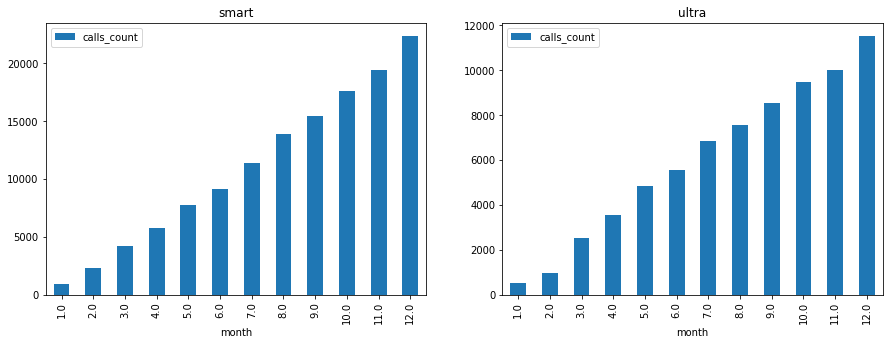

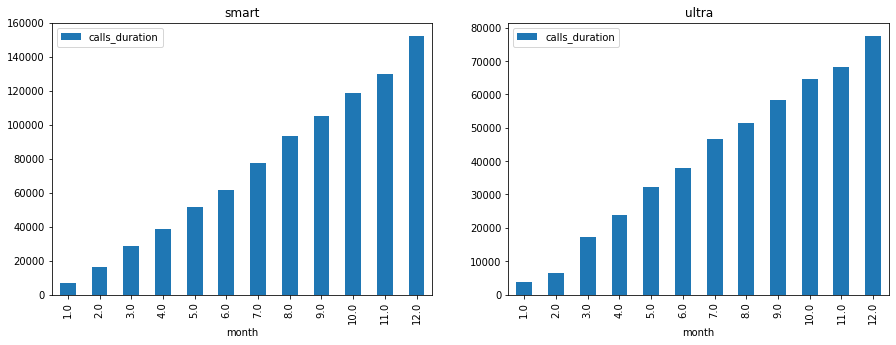

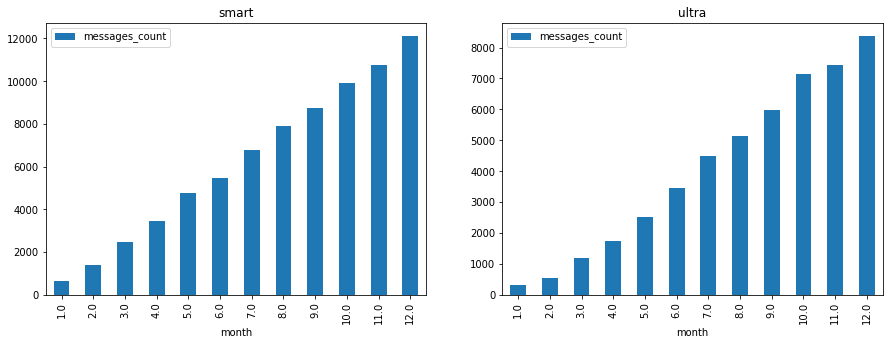

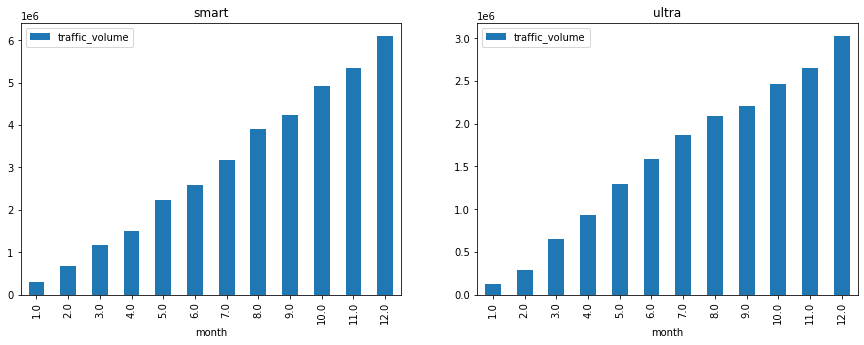

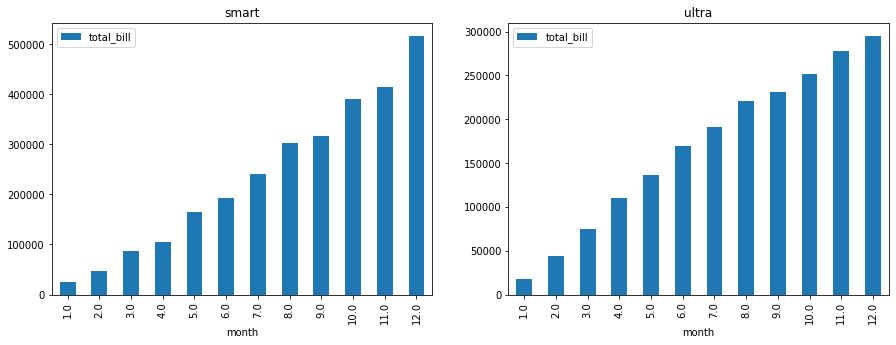

In [46]:
for dms_col_name in ['calls_count', 'calls_duration', 'messages_count', 'traffic_volume', 'total_bill']:
    fig, axs = plt.subplots(1,2)
    Df_month_sum[Df_month_sum.index=='smart'].plot(x='month', y=dms_col_name, kind='bar', title='smart', ax=axs[0], figsize=(15, 5))
    Df_month_sum[Df_month_sum.index=='ultra'].plot(x='month', y=dms_col_name, kind='bar', title='ultra', ax=axs[1], figsize=(15, 5))

In [47]:
Df_cmiu_pivot[Df_cmiu_pivot['tariff']=='smart']['tariff'].count()

2228

In [48]:
Df_cmiu_pivot[Df_cmiu_pivot['tariff']=='ultra']['tariff'].count()

975

Диаграммы показывают динамику поведения клиентов в течение рассматриваемого периода времени. В частности, можно сделать выводы, что:  
- все параметры (количество звонков, продолжительность разговоров, количество сообщений, объем израсходованного интернет-трафика и ежемесячный счет) растут от января к декабрю;  
- указанная зависимость линейная вне зависимости от того, какой тариф используют клиенты.  

Вычислим среднее, дисперсию и стандартное отклонение для всех пользователей в течение всего периода.

Для этого применим цикл, в котором с помощью сводных таблиц раассчитаем необходимые параметры.

In [49]:
for i in range(0, 3):
    functions = ['mean', np.var, np.std]# функции, которые будем применять к значениям
    tables = ['total_month_sum_mean', 'total_month_sum_var', 'total_month_sum_std']# названия сводных таблиц
    list_of_cols = ['calls_duration', 'messages_count', 'traffic_volume', 'total_bill']# значения
    suffix = ['_mean', '_var', '_std']# суффикс, который добавим к именам колонок
    
    tables[i] = Df_cmiu_pivot.pivot_table(index=['tariff'], values=list_of_cols, aggfunc=functions[i])
    tables[i].columns = ['calls_duration'+suffix[i], 'messages_count'+suffix[i],\
                         'traffic_volume'+suffix[i], 'total_bill'+suffix[i]]
    display(tables[i])

,calls_duration_mean,messages_count_mean,traffic_volume_mean,total_bill_mean
tariff,,,,
smart,395.078546,33.398564,1257.906194,16216.148564
ultra,500.517949,49.585641,2071.384615,19668.993846


,calls_duration_var,messages_count_var,traffic_volume_var,total_bill_var
tariff,,,,
smart,32353.071062,796.69963,641528.913064,3.436001e+07
ultra,89957.083610,2301.92464,142819.949455,9.886460e+07


,calls_duration_std,messages_count_std,traffic_volume_std,total_bill_std
tariff,,,,
smart,179.869595,28.225868,800.955001,5861.741292
ultra,299.928464,47.978377,377.915268,9943.067706


В среднем пользователи тарифа ультра больше пользуются услугами оператора, чем пользователи тарифа смарт.

Однако рассеяние вокруг среднего значения у ультра также выше, кроме параметра интернет-трафик. Тут можно выделить два момента:  
- большая дисперсия у ультра можно объяснить меньшим объемом выборки, чем у смарт;  
- меньшая дисперсия в интернет-трафике говорит о том, что возможно пользователи выбирают тариф ультра из-за большого включенного пакета мегабайт трафика, т.к. сейчас в основном большая часть звонков и сообщений передается посредством сети интернет;  
- пользователи ультра не заботятся об экономии трафика и используют его свободно, что приводит к среднему с меньшим разбросом;  
- пользователи смарт экономно используют свой лимит и в итоге к концу месяца у многих оставшийся трафик сгорает, а у некоторых, кто не следил за лимитом, - перерасход.

Построим частотные гистограммы для выыяснения какое количество пользователей тратит то или иное количество предоставленных услуг:

Сгруппируем данных сводной таблицей по тарифу и пользователям:

In [50]:
cmit_sum_for_hist = (Df_cmiu_pivot
                     .pivot_table(index=['tariff', 'user_id'],\
                                  values=['calls_count', 'calls_duration', 'messages_count', 'traffic_volume', 'total_bill'],\
                                  aggfunc=sum))

# расставим столбцы в удобном порядке:
cols = cmit_sum_for_hist.columns.tolist()
cols = cols[:3] + cols[-1:] + cols[-2:4]
cmit_sum_for_hist = cmit_sum_for_hist[cols]

cmit_sum_for_hist.reset_index(inplace=True)

cmit_sum_for_hist

,tariff,user_id,calls_count,calls_duration,messages_count,traffic_volume,total_bill
0,smart,1001,122.0,801.0,0.0,32467.0,1700.0
1,smart,1002,217.0,1434.0,70.0,116041.0,7250.0
2,smart,1005,888.0,6248.0,552.0,99692.0,9045.0
3,smart,1006,506.0,3296.0,0.0,164194.0,10250.0
4,smart,1007,612.0,4143.0,225.0,131631.0,7867.0
...,...,...,...,...,...,...,...
492,ultra,1476,549.0,3981.0,45.0,150290.0,17550.0
493,ultra,1485,94.0,548.0,155.0,23423.0,1950.0
494,ultra,1491,648.0,4353.0,432.0,161466.0,17550.0
495,ultra,1493,110.0,702.0,94.0,54421.0,5700.0


Построим гистограммы при помощи цикла рядом друг с другом, чтобы было проще сравнивать тарифы

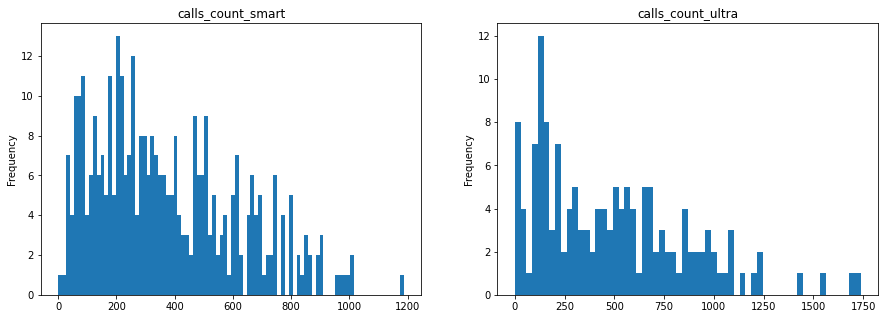

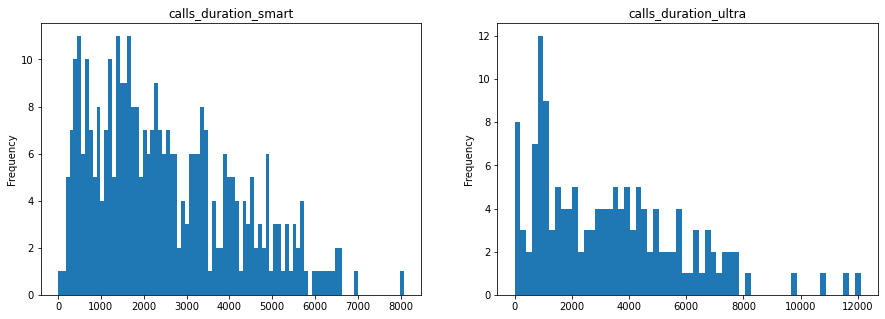

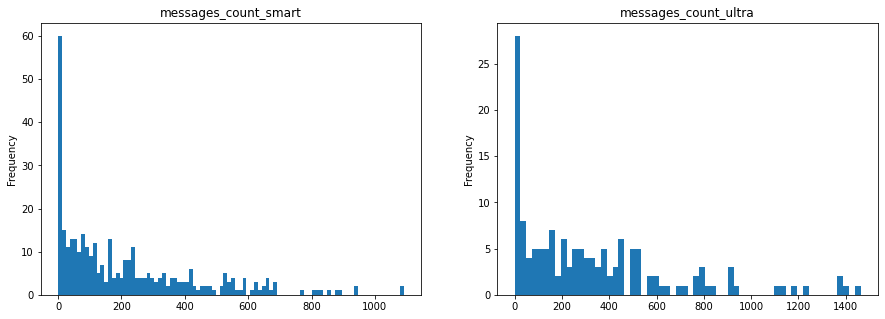

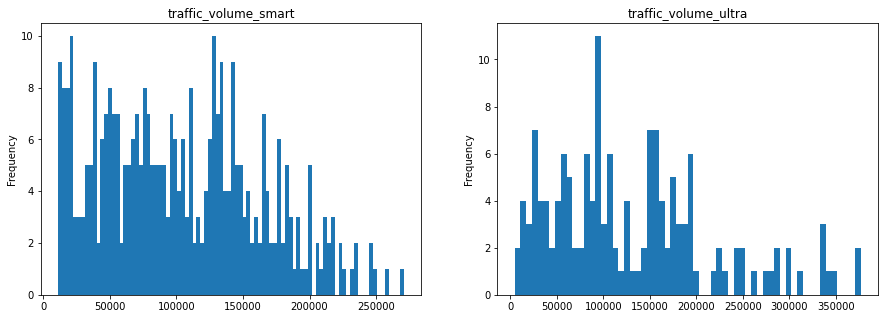

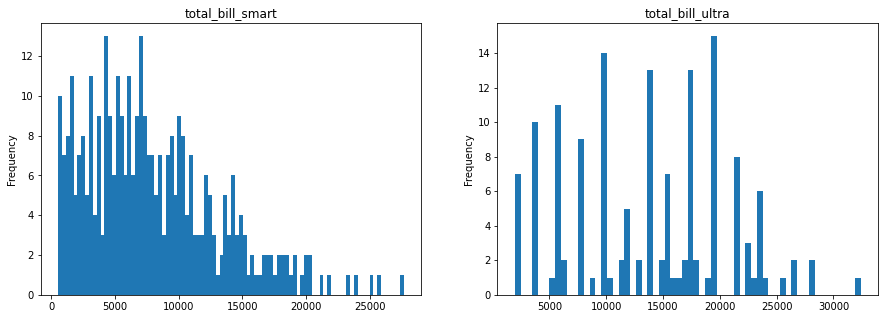

In [51]:
for csfh_name_column in cmit_sum_for_hist.columns[2:]:
    fig, axs = plt.subplots(1,2)
    cmit_sum_for_hist[cmit_sum_for_hist['tariff']=='smart'][csfh_name_column].plot(bins=90, kind='hist', figsize=(15, 5), title=csfh_name_column+'_smart', ax=axs[0])
    cmit_sum_for_hist[cmit_sum_for_hist['tariff']=='ultra'][csfh_name_column].plot(bins=60, kind='hist', figsize=(15, 5), title=csfh_name_column+'_ultra', ax=axs[1])

В силу большей дисперсии ультра имеет более длинные хвосты чем смарт.  
- количество звонков: Пик у смарт приходится на 200, у ультра - около 130.  
- длительность звонков: У смарт наблюдается два основных пика около 400 и 1500 минут, у ультра один - около 1000. В основном люди тарифа смарт говорят не больше 6000 минут в год, в то время как клиенты ультра почти 8000 минут. Также видим, что у ультра есть небольшой пик на околонулевых значениях (0 - 250).  
- количество сообщений: В обоих тарифах высока доля людей крайне мало использующих смс. При этом следует помнить, что ранее мы заменили 500 пропусков в датафрейме нулями и сейчас наблюдаем результаты этого действия. Но в любом случае все сейчас пользуются месенджерами.  
- интернет-трафик: У обоих тарифов наблюдается четкая граница в районе 200000 мб, после которой совсем мало значений. Пик у ультра в районе 100000 мб, у смарт два пика - один в районе 20000, другой около 130000 мб.  
- итоговый счет: Т.к. пользователи подключались в разное время года и не все оставались на одном тарифе до конца мы видим, что большая часть трат на связь находится до уровня минимальной годовой абонентской платы, которая для смарт составляет 6600, а для ультра 23400. У смарт второй пик находится в районе 7500, после чего идет плавное уменьшение числа людей перерасходовавших траифный план, т.е. большая часть людей хоть немного, но перерасходует тарифные лимиты. У ультра большинство пользователей тратит до 20000, после чего есть еще одна граница в районе 23000-24000, после чего небольшой хвост, т.е. пользователя тарифа ультра в основном укладываются в лимиты тарифного плана и не перерасходуют его.

## Проверка гипотез

 Первая гипотеза

Первая гипотеза которую нужно проверить - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.  
Сформулируем нулевую и альтернативную гипотезы:  
- H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны (в H0 всегда используется знак равенства);
- H1 - средние выручки пользователей тарифов «Ультра» и «Смарт» различаются.


Чтобы проверить гипотезу о равенстве среднего применим метод scipy.stats.ttest_ind (array1, array2, equal_var), где equal_var - параметр, задающий считать ли равными дисперсии выборок. Передаётся как "equal_var = True" или "equal_var = False" (True — считать, False — не считать). Т.к. мы знаем, что дисперсии выборок по смарт и ультра различаются (3.436001e+07 и 9.886460e+07 соответственно), то equal_var зададим как False.

In [52]:
smart_ttest = Df_cmiu_pivot[Df_cmiu_pivot['tariff']=='smart']['total_bill']
ultra_ttest = Df_cmiu_pivot[Df_cmiu_pivot['tariff']=='ultra']['total_bill']

# уровень значимости зададим равным 5%
alpha = 0.05

results = st.ttest_ind(smart_ttest, ultra_ttest, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1678550574171129e-272
Отвергаем нулевую гипотезу


p - уровень значимости слишком мал, гораздо меньше определенного нами порогового значения в 5% => средняя выручка пользователей тарифов смарт и ульра значимо отличаются друг от друга.

Вторая гипотеза

Вторая гипотеза для проверки звучит так - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.  
- Н0 - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов;  
- Н1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.  
Альтернативная гипотеза у нас двусторонняя, т.к. средняя выручка из Москвы может отличаться от других регионов как в большую так и в меньшую сторону.

Для проверки гипотезы воспользуемся методом scipy.stats.ttest_1samp (array, popmean), где в качестве массива данных будет выборка выручки по москвичам, а в качестве popmean (предполагаемого среднего, на равенство которому мы делаем тест) будет выступать среднее значение выручки пользователей из других регионов.

In [53]:
moscow_ttest = Df_cmiu_pivot[Df_cmiu_pivot['city']=='Москва']['total_bill']

popmean = Df_cmiu_pivot[Df_cmiu_pivot['city']!='Москва']['total_bill'].mean()

# уровень значимости 5%
alpha = 0.05

results = st.ttest_1samp(moscow_ttest, popmean)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.3859979276331743
Не получилось отвергнуть нулевую гипотезу


р - уровень значимости составил почти 39%, что значительно выше 5% => средняя выручка по Москве статистически значимо не отличается от средней выручки по другим регионам.

## Общий вывод

Были представлены датасеты с информацией о 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. В ходе аналитического исследования была проведена следующая работа: 
    
    - Проведена преобработка данных включающая в себя: проверка на наличие отрицательных значений, проверка на наличие дубликатов, приведение данных к корректным типам в каждом датафрейме, найдены и исправлены ошибки;
    - Созданы датасеты для рассчета следующих величин: количество соверешнных звонков и израсходованных минут разговора ежемесячно, количество отправленных сообщений ежемесячно, объем израсходованного интернет-трафика ежемесячно, ежемесячная выручка с каждого пользователя;
    - Проведен исследовательский анализ вышеуказанных величин;
    - Провераны 2 гипотезы:
        - о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равна;
        - о том, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов. 
    
По результама проведенного анализа были сделаны следующие выводы.  
     Средние чеки тарифов "Смарт" и "Ультра" значимо различаются. В среднем пользователи тарифа "Ультра" платят больше (что было подтверждено в том числе в результате опровержения гипотезы о равенстве средняя выручка пользователей тарифов «Ультра» и «Смарт»);  
    Выяснили, что абоненты тарифа "Смарт" используют чуть меньшее количество минут звонков и сообщений в месяц, чем пользователи "Ультра". Лимита на звонки и минуты в "Ультра" в среднем не достигает никто. При этом интернетом пользователи "Ультра" пользуются гораздо активнее. Скорее всего, пользователи "Ультра" выбирают этот тариф из-за большего интернет-трафика;     Средняя выручка по Москве и другим регионам значимо не различаются (что было подтверждено соответствующей гипотезой).

В отношении количественных показателей тарифов можно, в частности, обратить внимание на следуюещие особенности: 

    количество звонков: пик у абонентов тарифа "Смарт" приходится на 200, у абонентов тарифа "Ультра" - около 130;
    длительность звонков: У абонентов тарифа "Смарт" наблюдается два основных пика около 400 и 1500 минут, у абонентов тарифа "Ультра" один - около 1000. В основном  абонентов тарифа "Смарт" говорят не больше 6000 минут в год, в то время как абоненты тарифа "Ультра" почти 8000 минут. Также видно, что у абонентов тарифа "Ультра" есть небольшой пик на околонулевых значениях (0 - 250);
    количество сообщений: в обоих тарифах высока доля людей крайне мало использующих СМС. При этом следует помнить, что ранее были заменены 500 пропусков в датафрейме нулями. Но в любом случае все сейчас пользуются месенджерами;
    интернет-трафик: У обоих тарифов наблюдается четкая граница в районе 200000 мб, после которой совсем мало значений. Пик у абонентов тарифа "Ультра" в районе 100000 мб, у абонентов тарифа "Смарт" два пика - один в районе 20000, другой около 130000 мб.
    итоговый счет: Т.к. пользователи подключались в разное время года и не все оставались на одном тарифе до конца можно сделат выводы о том, что большая часть трат на связь находится до уровня минимальной годовой абонентской платы, которая для абонентов тарифа "Смарт" составляет 6600, а для абонентов тарифа "Ультра" 23400. У абонентов тарифа "Смарт" второй пик находится в районе 7500, после чего идет плавное уменьшение числа абонентов перерасходовавших тарифный план, т.е. большая часть людей хоть немного, но перерасходует тарифные лимиты. У абонентов тарифа "Ультра" большинство пользователей тратит до 20000, после чего есть еще одна граница в районе 23000-24000, после чего небольшой хвост, т.е. абоненты тарифа "Ультра" в основном укладываются в лимиты тарифного плана и не перерасходуют его.

Сделав предварительный анализ тарифов на небольшой выборке пользователей можем передать следующие результаты коммерческому отделу:
   
    Т.к. средняя выручка по Москве и другим регионам значимо не различаются, то рекламную компанию можно устроить по всей территории распространения сети;
    Поведение клиентов в течение года очень хорошо отображено на графиках. Эти графики будут полезны чтобы скорректировать во времени рекламные компании;
    Тариф "Ультра" приносит компании большую выручку, чем тариф "Смарт", поэтому стоит сфокусировать маргетинговые усилия на его продвижении повсеместно как в Москве так и регионах.